Only gradients of hidden affine layers are included.

In [1]:
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline
import cPickle as pickle
from scipy.stats import norm as gaussian

In [2]:
activations = ('Tanh', 'ReLU')
data = {activation : {} for activation in activations}
for activation in activations:
    for ini_mode in ('default', 'layer-by-layer'):
        data[activation][ini_mode] = \
            pickle.load(open('initial-gradient-%s-%s' % (activation, ini_mode), 'rb'))

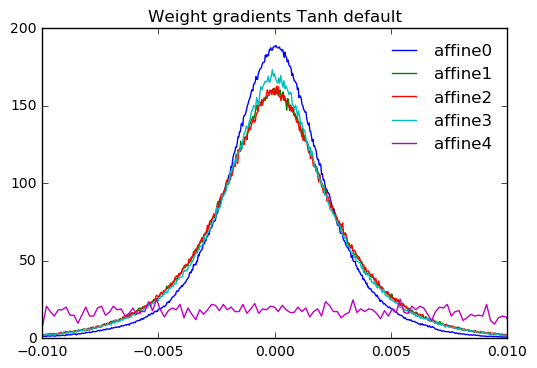

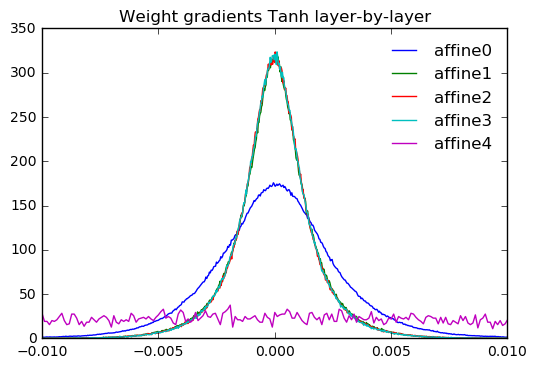

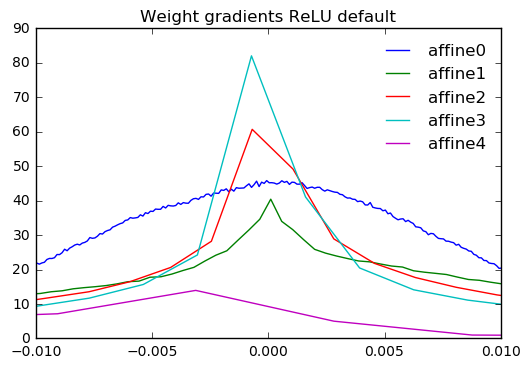

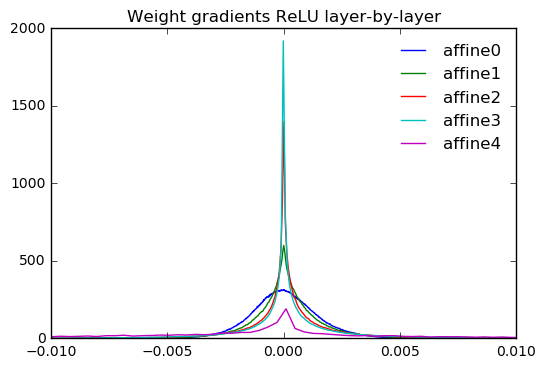

In [9]:
for activation in ('Tanh', 'ReLU'):
    for ini_mode in ('default', 'layer-by-layer'):
        gradients = data[activation][ini_mode]
        pl.figure()
        for key in sorted(gradients.keys()):
            value = gradients[key]
            if 'weight' in key:
                key = key.replace('fullyconnected', 'affine').replace('_weight', '')
                densities, edges = np.histogram(value.flatten(), bins=1024, normed=True)
                centers = 0.5 * (edges[:-1] + edges[1:])
                pl.plot(centers, densities, label=key)
                pl.xlim(-0.01, 0.01)
        pl.legend(framealpha=0, loc='upper right')
        pl.title('Weight gradients %s %s' % (activation, ini_mode))